In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential,layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv('ecommerceDataset.csv',header=None)
df.head()

,0,1
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [3]:
df=df.sample(frac=1).reset_index(drop=True)[0:1000]
df.head()

,0,1
0,Household,Planet High Grade Metal Wall Mount Mail Box/Le...
1,Books,Data Communications and Networking
2,Books,Monopoly Electronic Banking Board Game Style N...
3,Electronics,CBSE Chemistry Chapterwise Solved Papers Class...
4,Electronics,Quantem QHM7403 USB Keyboard (Black) If your k...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [5]:
df.isna().sum()

0    0
1    0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [8]:
for i in range(5):
    print(df[0][i],'.......',df[1][i])
    print('\n')

Household ....... Planet High Grade Metal Wall Mount Mail Box/Letter Box for gate and Wall (Ivory-Black) Planet offers an excellent unique letter box. It has strong, sturdy lock. High grade iron material body will keep your mail safe and secure. Long last powder coating and nice black color enhance your exterior look.


Books ....... Data Communications and Networking 


Books ....... Monopoly Electronic Banking Board Game Style Name:Electronic Banking   Product Description  When thinking of board games for kids and adults alike, Monopoly is a choice that often comes quickly to mind. Monopoly is one of the most popular board games available today. It is played in nearly every nation of the world. Though it is considered to be a game for kids, it is thoroughly enjoyed by adults as well. In addition, the traditional Monopoly board has now gone high tech and features an e-bank. One of the major electronic games for kids, the Monopoly electronic game is not much different from the traditio

In [9]:
def preprocess(sentence):
    sentence=sentence.lower()
    
    text=re.sub(r"[^0-9a-zA-Z]",' ',sentence).split()
    
    lemma=WordNetLemmatizer()
    text=[lemma.lemmatize(i) for i in text]
    
    return ' '.join(text)

In [10]:
df[1]=df[1].apply(preprocess)

In [11]:
for i in range(5):
    print(df[0][i],'.......',df[1][i])
    print('\n')

Household ....... planet high grade metal wall mount mail box letter box for gate and wall ivory black planet offer an excellent unique letter box it ha strong sturdy lock high grade iron material body will keep your mail safe and secure long last powder coating and nice black color enhance your exterior look


Books ....... data communication and networking


Books ....... monopoly electronic banking board game style name electronic banking product description when thinking of board game for kid and adult alike monopoly is a choice that often come quickly to mind monopoly is one of the most popular board game available today it is played in nearly every nation of the world though it is considered to be a game for kid it is thoroughly enjoyed by adult a well in addition the traditional monopoly board ha now gone high tech and feature an e bank one of the major electronic game for kid the monopoly electronic game is not much different from the traditional monopoly game board one of the 

In [12]:
df[0].value_counts()

Household                 378
Books                     233
Electronics               218
Clothing & Accessories    171
Name: 0, dtype: int64

<AxesSubplot:xlabel='count', ylabel='0'>

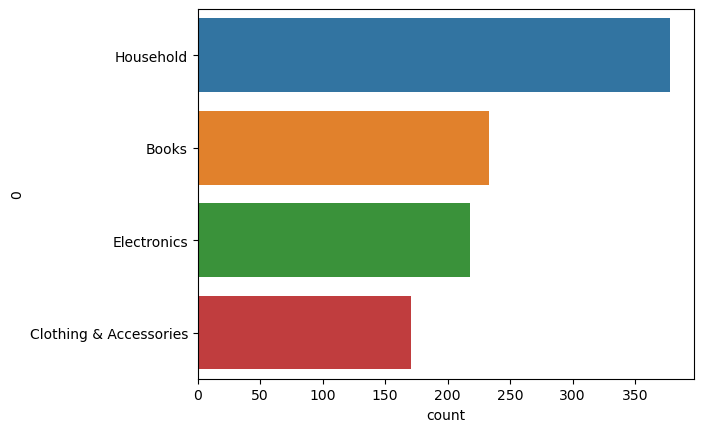

In [13]:
sns.countplot(data=df,y=0)

In [14]:
x=df[1]
y=df[0]

In [15]:
y

0                   Household
1                       Books
2                       Books
3                 Electronics
4                 Electronics
                ...          
995               Electronics
996                 Household
997    Clothing & Accessories
998                     Books
999               Electronics
Name: 0, Length: 1000, dtype: object

In [16]:
y.unique()

array(['Household', 'Books', 'Electronics', 'Clothing & Accessories'],
      dtype=object)

In [17]:
y=y.map({'Books':0,'Clothing & Accessories':1,'Electronics':2,'Household':3})

In [18]:
y

0      3
1      0
2      0
3      2
4      2
      ..
995    2
996    3
997    1
998    0
999    2
Name: 0, Length: 1000, dtype: int64

In [19]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x)

In [20]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'for': 6,
 'in': 7,
 'is': 8,
 'with': 9,
 'it': 10,
 'your': 11,
 'you': 12,
 'this': 13,
 'on': 14,
 's': 15,
 'or': 16,
 'that': 17,
 'from': 18,
 'can': 19,
 'are': 20,
 'be': 21,
 'an': 22,
 '1': 23,
 'book': 24,
 'all': 25,
 'ha': 26,
 '2': 27,
 'at': 28,
 'by': 29,
 'product': 30,
 'time': 31,
 '3': 32,
 'will': 33,
 'one': 34,
 'size': 35,
 'color': 36,
 'he': 37,
 'easy': 38,
 'not': 39,
 'about': 40,
 'up': 41,
 'make': 42,
 'design': 43,
 'author': 44,
 'have': 45,
 'black': 46,
 '5': 47,
 'quality': 48,
 'made': 49,
 'which': 50,
 'set': 51,
 'use': 52,
 'high': 53,
 'his': 54,
 'x': 55,
 'also': 56,
 'any': 57,
 'home': 58,
 'more': 59,
 '4': 60,
 'new': 61,
 'come': 62,
 'feature': 63,
 'material': 64,
 'life': 65,
 'our': 66,
 'light': 67,
 'power': 68,
 'we': 69,
 'inch': 70,
 'cotton': 71,
 'so': 72,
 'look': 73,
 'these': 74,
 'best': 75,
 'white': 76,
 'into': 77,
 'wa': 78,
 'work': 79,
 'usb': 80,
 'most': 81,
 'w

In [21]:
vocab_size=len(tokenizer.word_index)+1

In [22]:
vocab_size

12263

In [23]:
def text_encoding(txt):
    encoded_text=tokenizer.texts_to_sequences(txt)
    
    padded=pad_sequences(encoded_text,maxlen=128)
    
    return padded

In [24]:
x=text_encoding(x)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
model=Sequential([
    layers.Embedding(vocab_size,128),
    
    layers.Bidirectional(layers.LSTM(128,return_sequences=True)),
    layers.Dropout(0.2),
    
    layers.Bidirectional(layers.LSTM(128)),
    layers.Dropout(0.2),
    
    layers.Dense(4,activation='sigmoid')
])

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
model.fit(x_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10
24/24 [==============================] - 24s 998ms/step - loss: 0.8992 - accuracy: 0.5908 - val_loss: 0.9938 - val_accuracy: 0.5000
Epoch 2/10
24/24 [==============================] - 24s 975ms/step - loss: 0.6237 - accuracy: 0.7289 - val_loss: 1.0284 - val_accuracy: 0.6500
Epoch 3/10
24/24 [==============================] - 23s 956ms/step - loss: 0.3062 - accuracy: 0.9000 - val_loss: 0.5576 - val_accuracy: 0.8500
Epoch 4/10
24/24 [==============================] - 23s 967ms/step - loss: 0.1548 - accuracy: 0.9566 - val_loss: 0.7082 - val_accuracy: 0.7500
Epoch 5/10
24/24 [==============================] - 23s 978ms/step - loss: 0.0895 - accuracy: 0.9816 - val_loss: 0.9784 - val_accuracy: 0.7000
Epoch 6/10
24/24 [==============================] - 24s 1s/step - loss: 0.0690 - accuracy: 0.9842 - val_loss: 0.7989 - val_accuracy: 0.8250
Epoch 7/10
24/24 [==============================] - 27s 1s/step - loss: 0.0428 - accuracy: 0.9908 - val_loss: 0.8680 - val_accuracy: 0.7750
Epoch

In [30]:
y_pred=model.predict(x_test)

7/7 [==============================] - 4s 228ms/step


In [31]:
y_pred

array([[0.56460536, 0.9680385 , 0.20293647, 0.20819986],
       [0.07957711, 0.28114125, 0.9791845 , 0.3084672 ],
       [0.9930499 , 0.34532553, 0.0381355 , 0.14462349],
       [0.42409402, 0.03488797, 0.14595073, 0.99621654],
       [0.2019291 , 0.01218376, 0.77938503, 0.9755437 ],
       [0.22674684, 0.07009289, 0.16751176, 0.9972593 ],
       [0.2742832 , 0.02725252, 0.2458813 , 0.997827  ],
       [0.03820577, 0.1924041 , 0.9908825 , 0.37793338],
       [0.10845134, 0.08149061, 0.4648768 , 0.9951709 ],
       [0.40744075, 0.07726911, 0.10192311, 0.9941745 ],
       [0.44138554, 0.98440415, 0.24273244, 0.11727161],
       [0.56070465, 0.9884966 , 0.16717301, 0.10166254],
       [0.45288765, 0.02681955, 0.12927538, 0.99730784],
       [0.465456  , 0.99081796, 0.20230654, 0.10247061],
       [0.1765237 , 0.0796009 , 0.25936493, 0.9965079 ],
       [0.9930493 , 0.3739279 , 0.03415276, 0.16009773],
       [0.18983011, 0.07999772, 0.21721719, 0.9970702 ],
       [0.04751983, 0.23323846,

In [32]:
predicted=[np.argmax(i) for i in y_pred]

In [33]:
predicted

[1,
 2,
 0,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 0,
 3,
 2,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 0,
 0,
 2,
 1,
 0,
 3,
 0,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 1,
 0,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 1,
 0,
 3,
 0,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 1,
 2,
 3,
 0,
 3,
 2,
 3,
 0,
 2,
 3,
 3,
 3,
 1,
 2,
 0,
 0,
 2,
 3,
 2,
 3,
 0,
 1,
 3,
 3,
 0,
 2,
 1,
 3,
 1,
 2,
 0,
 3,
 3,
 2,
 1,
 1,
 0,
 2,
 2,
 3,
 3,
 3,
 3,
 1,
 2,
 3,
 1,
 3,
 2,
 3,
 0,
 3,
 0,
 2,
 1,
 3,
 0,
 0,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 2,
 3,
 1,
 3,
 0,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 0,
 3,
 3,
 1,
 3,
 1,
 0,
 1,
 2,
 3,
 0,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 0,
 1,
 2,
 2,
 1,
 0,
 0,
 3,
 3,
 3,
 0,
 1,
 0,
 3,
 0,
 3,
 3,
 0,
 3,
 1,
 1,
 2,
 0,
 1,
 3,
 3,
 3,
 2,
 0,
 2]

In [36]:
accuracy_score(y_test,predicted)

0.835

<AxesSubplot:>

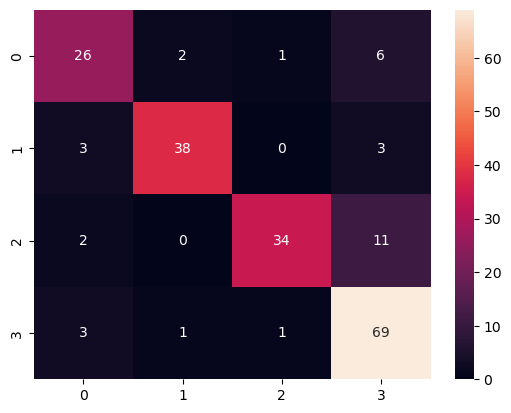

In [37]:
sns.heatmap(confusion_matrix(y_test,predicted),annot=True,fmt='d')

In [38]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        35
           1       0.93      0.86      0.89        44
           2       0.94      0.72      0.82        47
           3       0.78      0.93      0.85        74

    accuracy                           0.83       200
   macro avg       0.85      0.82      0.83       200
weighted avg       0.85      0.83      0.83       200

